[10.78, 25.68, 57.92, 74.04, 70.36]
[78.25, 81.36, 80.25, 10.0, 10.0]
[39.77, 60.4, 75.47, 79.14, 75.46]
[80.83, 83.37, 82.52, 10.0, 10.0]
[58.49, 76.91, 81.99, 83.65, 81.61]
[82.53, 84.81, 84.31, 10.0, 10.0]


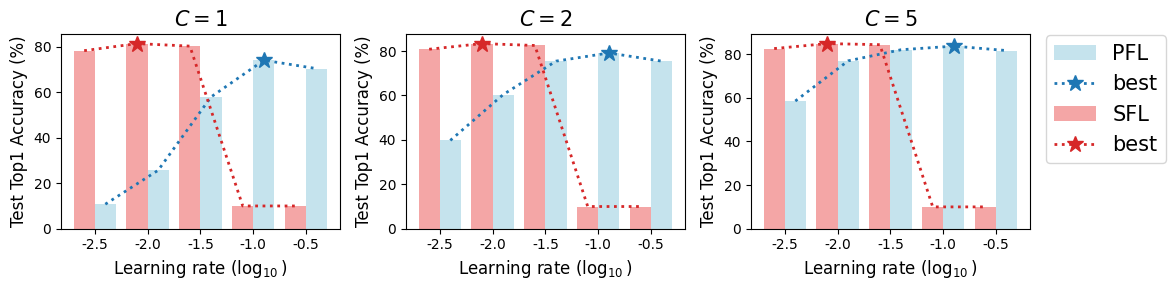

In [155]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/moon/data/exps/sequential_local_sgd/")
path = "/home/moon/data/exps/sequential_local_sgd/"

from sim.utils.record_utils import read_fromcsv
from plot_utils import save_fig_timestamp


def process_data(pattern='', setup = {'dataset': 'cifar10', 'end': 2000, 'select': 10, 'y': 5}):
    #pattern = "FedAvg1.0_M500,10_K5_R2000,10_cnn_fashionmnist_exdir1,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10"
    lrs = [0.00316, 0.01, 0.0316, 0.1, 0.316]
    values = []
    dataset = setup['dataset']
    for lr in lrs:
        #print(lr)
        file = re.sub(r'sgd[\d|\.]+,', 'sgd{},'.format(lr), pattern)
        #print(file)
        df = read_fromcsv(file, path+f'save/{dataset}/')
        df = df[df['round'] <= setup['end']]
        curr_value = df.iloc[:, setup['y']].values[-setup['select']:].mean(axis=0)
        values.append(round(curr_value, 2))
    print(values)
    return values


def plot_bar(ax, patterns='', setup=''):
    bar_width = 0.4

    y1 = process_data(pattern=patterns[0], setup = setup)
    y2 = process_data(pattern=patterns[1], setup = setup)

    y1_mark, y2_mark = np.array(y1) == max(y1), np.array(y2) == max(y2)

    x = np.arange(5)
    ax.bar(x + bar_width / 2, y1, bar_width, label='PFL', color='lightblue', alpha=0.7)
    ax.plot(x + bar_width / 2, y1, linestyle=':', color='C0', linewidth=2, marker='*', markevery=y1_mark, markersize=12, label='best')
    
    ax.bar(x - bar_width / 2, y2, bar_width, label='SFL', color='lightcoral', alpha=0.7)
    ax.plot(x - bar_width / 2, y2, linestyle=':', color='C3', linewidth=2, marker='*', markevery=y2_mark, markersize=12, label='best')
    
    # https://blog.csdn.net/liegu0317/article/details/123187978
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_xticklabels([-2.5, -2.0, -1.5, -1.0, -0.5])
    ax.tick_params(labelsize=10)

    #ax.set_title('C=', fontsize=12)
    ax.set_xlabel('Learning rate ($\log_{10}$)', fontsize=12)
    ax.set_ylabel('Test Top1 Accuracy (%)', fontsize=12)
    #ax.legend(loc=1, ncols=1, fontsize=15)


def main():
    setup = {'dataset':'cifar10','end': 5000, 'select': 10, 'y': 5}

    fig, axs = plt.subplots(1, 3, figsize=(10.5, 3))
    patterns = [
"FedAvg1.0_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir1,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10",
"CWT_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir1,100.0_sgd0.01,0.0,0.0_exp1.0_b20_seed0_clip50",
]
    plot_bar(axs[0], patterns, setup=setup)
    patterns = [
"FedAvg1.0_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir2,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10",
"CWT_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir2,100.0_sgd0.01,0.0,0.0_exp1.0_b20_seed0_clip50",
]
    plot_bar(axs[1], patterns, setup=setup)
    patterns = [
"FedAvg1.0_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir5,100.0_sgd0.1,0.0,0.0_exp1.0_b20_seed0_clip10",
"CWT_M500,10_K5_R5000,10_wvgg9k4_cifar10_exdir5,100.0_sgd0.01,0.0,0.0_exp1.0_b20_seed0_clip50",
]
    plot_bar(axs[2], patterns, setup=setup)



    #axs[0].set_ylabel('Test Top1 Accuracy (%)', fontsize=12)
    #axs[0].legend(loc=1, ncols=1, fontsize=15)
    for i in range(3):
        axs[i].set_title('$C={}$'.format([1,2,5][i]), fontsize=15)
    fig.tight_layout()
    #fig.subplots_adjust(hspace=10000) # no effect? why?

    handles, labels = axs[0].get_legend_handles_labels()
    handles = [handles[2],handles[0], handles[3], handles[1] ]
    labels = [labels[2], labels[0], labels[3], labels[1] ]
    
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.125, 0.9), fontsize=15, )
    #save_fig_timestamp(fig, '.pdf', '../figs/')
    #fig.savefig('{}/{}{}'.format(f'{path}/figs/', 'learning-rate-{}'.format(setup['dataset']), '.pdf'), bbox_inches='tight', dpi=300)


if __name__ == '__main__':
    main()